# Numerical Integration
### by [Richard W. Evans](https://sites.google.com/site/rickecon/), January 2019
The code in this Jupyter notebook was written using Python 3.6. All references cited in this notebook are fully cited in Section 7 at the end of the notebook.

## 1. Introduction
Integrals of the form $\int_a^b g(x)dx$ arise often in economic models. One example is the aggregating of consumption amounts of a continuum of differentiated goods $c_t(i)$,
\begin{equation}\label{NumInt_EqArmAggr}
    C_t = \left(\int_0^1 \alpha_i^\frac{1}{\varepsilon}c_t(i)^\frac{\varepsilon-1}{\varepsilon}di\right)^\frac{\varepsilon}{\varepsilon-1}
\end{equation}
where $C_t$ is aggregate consumption, $\alpha_i$ is a weight on the particular amount of consumption of good $i$, $\varepsilon$ is the constant elasticity of substitution between different goods $i$, and the measure of goods is normalized to be between 0 and 1, without loss of generality. This consumption aggregator is often called the Armington aggregator as it was first proposed in Armington (1969). It is also known as a Dixit-Stiglitz aggregator after its use in Dixit and Stiglitz (1977). Another key example of an integral that often occurs in macroeconomics is the expectations operator on the right-hand-side of the standard intertermporal Euler equation,
\begin{equation}\label{NumInt_EqEulEx}
  \begin{split}
    u'(c_t) &= \beta E_{z_{t+1}|z_t}\Bigl[(1+r_{t+1}-\delta)u'(c_{t+1})\Bigr] \\
    \Rightarrow\quad u'(c_t) &= \beta\int_a^b \Bigl(1+r_{t+1}(z_{t+1})-\delta\Bigr)u'\Bigl(c_{t+1}(z_{t+1})\Bigr)f(z_{t+1}|z_t)dz_{t+1}
  \end{split}
\end{equation}
where $a$ and $b$ are the bounds of the support of $z_{t+1}$ and $f(z_{t+1}|z_t)$ is the pdf of $z_{t+1}$ that could potentially be conditional on $z_t$.

It is a rare convenience when these integrals can be evaluated analytically. However, it does not take much richness in functional form to render analytical solutions impossible for many integrals in economic models. In these cases, the integral must be computed numerically. The following discussion of numerical integration draws from the great treatments of the subject in Heer and Maussner (2009, pp. 598-603), Judd (1998, ch. 7), and Adda and Cooper (2003, pp. 55-60).

## 2. Newton-Cotes Quadrature
Newton-Cotes quadrature forumalas approximate the integral of a function $\int_a^b g(x)dx$ by evaluating the function at $N$ equally spaced nodes $\{x_1,x_2,...x_N\}$ and weighting those nodes with $N$ weights $\{\omega_1,\omega_2,...\omega_N\}$. The general form of Newton-Cotes quadrature forumulas is
\begin{equation}\label{NumInt_EqNewtCotesGen}
  \int_a^b g(x)dx \approx \sum_{n=1}^N\omega_n g(x_n)
\end{equation}

### 2.1. Midpoint rule (1 node)
The midpoint rule is the simplest Newton-Cotes formula and uses only one node or evaluation of the function. It is simply a Riemann sum approximation over the domain of the function $g(x)$. The midpoint formula simply evaluates the function at the midpoint of the domain of $x = \frac{a+b}{2}$ and assumes that the function is a constant at that level over the entire domain of $x\in[a,b]$.
\begin{equation}\label{NumInt_EqMidPtRule}
  \int_a^b g(x)dx \approx (b-a)g\left(\frac{a+b}{2}\right)
\end{equation}

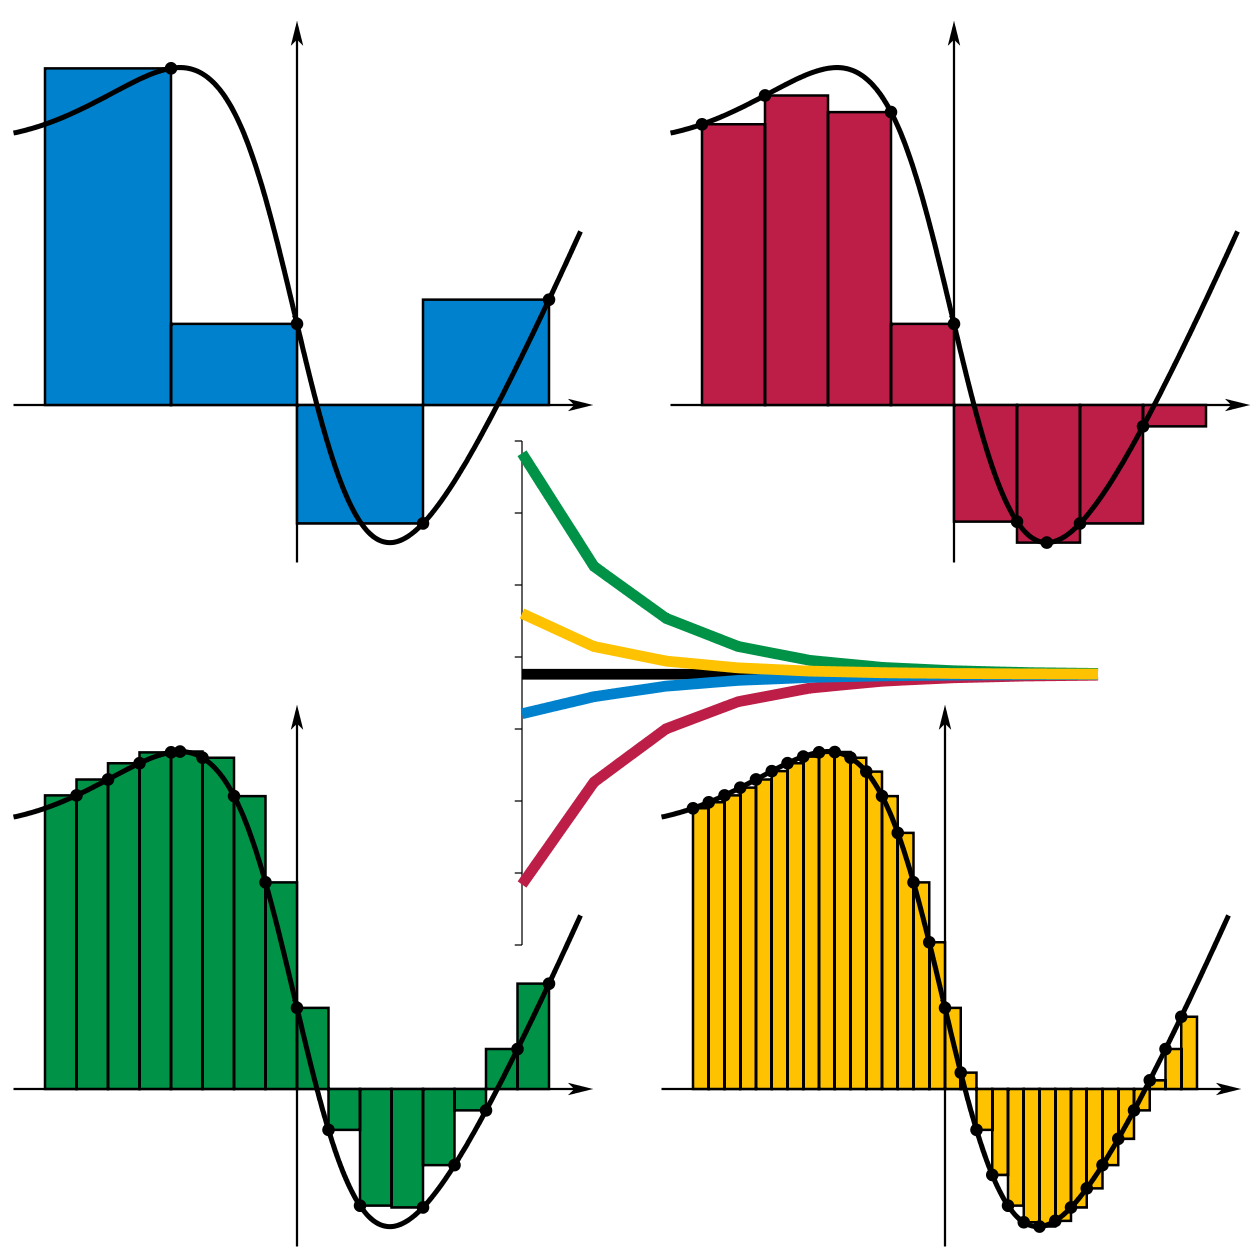

In [8]:
import requests
from IPython.display import Image

# Download and save the data file Riemann_sum_convergence.png
url = ('https://raw.githubusercontent.com/rickecon/Notebooks/' +
       'master/NumIntegr/images/Riemann_sum_convergence.png')
image_file = requests.get(url, allow_redirects=True)
open('images/Riemann_sum_convergence.png', 'wb').write(image_file.content)
Image('images/Riemann_sum_convergence.png')

A more sophisticated midpoint rule is the composite midpoint rule, which breaks up the domain of the function $g(x)$ into $N$ intervals and applies the midpoint rule to each interval. For nodes $x_0,x_1,\ldots,x_{N-1}$ with $x_i=a+\frac{(2i+1)(b-a)}{2N}$, the composite midpoint rule is given by
\begin{equation}\label{NumInt_EqMidPtRuleComp}
  \int_a^b g(x)dx \approx \frac{b-a}{N}\sum_{i=0}^{N-1}g(x_i)
\end{equation}

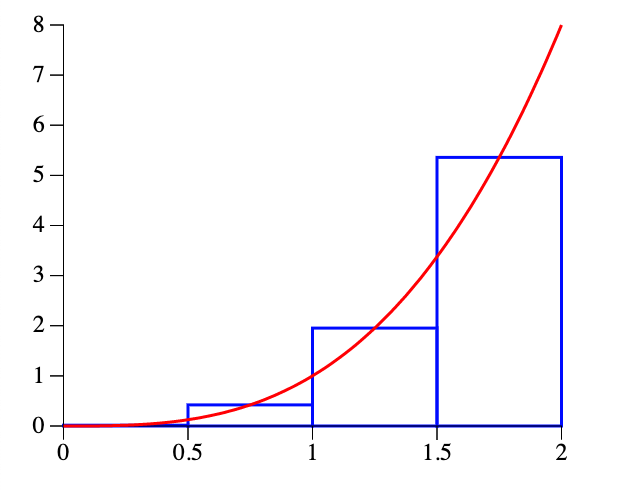

In [16]:
# Download and save the data file MidRiemann2.png
url = ('https://raw.githubusercontent.com/rickecon/Notebooks/' +
       'master/NumIntegr/images/MidRiemann2.png')
image_file = requests.get(url, allow_redirects=True)
open('images/MidRiemann2.png', 'wb').write(image_file.content)
Image('images/MidRiemann2.png')

### 2.2. Trapezoid rule (2 nodes)
The trapezoid rule estimates the integral as the area under a line that connects the function $g(x)$ at the two endpoints $a$ and $b$.
\begin{equation}\label{NumInt_EqTrapRule}
  \int_a^b g(x)dx \approx \frac{b-a}{2}\bigl[g(a) + g(b)\bigr]
\end{equation}

A more sophisticated trapezoid rule is the composite trapezoid rule, which breaks up the domain of the function $g(x)$ into $N$ intervals and applies the trapezoid rule to each interval.  For nodes $x_0,x_1,\ldots,x_N$ with $x_i=a+i(b-a)/N$, the composite trapezoid rule is given by
\begin{equation}\label{NumInt_EqTrapRuleComp}
  \int_a^b g(x)dx \approx \frac{b-a}{2N}\left[g(x_0) + 2\sum_{i=1}^{N-1}g(x_i) + g(x_N)\right]
\end{equation}

In [ ]:
Integration_num_trapezes_notation.png

### 2.3. Simpson's rule (3 nodes)
Simpson's rule offers a smooth nonlinear (quadratic) alternative the linear approximations of the midpoint and trapezoid rules. Simpson's rule finds the unique quadratic function in $x$ that passes through the end points and the midpoint of the function $g(a)$, $g\left(\frac{a+b}{2}\right)$, and $g(b)$, which produces the following weights and values.
\begin{equation}\label{NumInt_EqSimpsRule}
  \int_a^b g(x)dx \approx \frac{b-a}{6}\left[g(a) + 4g\left(\frac{a+b}{2}\right) + g(b)\right]
\end{equation}

Again, a more sophisticated Simpson's rule is the composite Simpson's rule, which breaks up the domain of the function $g(x)$ into $N$ intervals and applies the Simpson's rule to each interval.  For nodes $x_0,x_1,\ldots,x_{2N}$ with $x_i=a+i(b-a)/(2N)$, the composite Simpson's rule is given by
\begin{equation}\label{NumInt_EqTrapRuleComp2}
  \int_a^b g(x)dx \approx \frac{b-a}{6N}\left[g(x_0) + 4\sum_{i=1,3,\ldots}^{2N-1}g(x_i) + 2\sum_{i=2,4,\ldots}^{2N-2}g(x_i) + g(x_{2N})\right]
\end{equation}

### 2.4. Exercises

**Exercise 2.1.** You can verify that the analytical solution to the integral of the function
\begin{equation*}
  g(x)=0.1x^4 -1.5x^3 + 0.53x^2 + 2x + 1
\end{equation*}
between $x=-10$ and $x=10$ is $\int_{-10}^{10} g(x)dx = 4,373.3\bar{3}$. Write a Python function that will take as arguments an anonymous function that the user specifies representing $g(x)$, integration bounds $a$ and $b$, the number of intervals $N$, and
```python
method = {'midpoint', 'trapezoid', 'Simpsons'}
```
Using the composite methods, evaluate the numerical approximations of the integral $\int_a^b g(x)dx$ using all three Newton-Cotes methods in your function and compare the difference between the values of these integrals to the true analytical value of the integral.

**Exercise 2.2.** Write a Python function that makes a Newton-Cotes discrete approximation of the distribution of the normally distributed variable $Z \sim N(\mu,\sigma)$. Let this function take as arguments the mean $\mu$, the standard deviation $\sigma$, the number of equally spaced nodes $N$ to estimate the distribution, and the number of standard deviations $k$ away from $\mu$ to make the furthest nodes on either side of $\mu$. Use the [`scipy.stats.norm.cdf`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) command for the cdf of the normal distribution to compute the weights $\omega_n$ for the nodes $x_n$. Have this function return a vector of nodes of $[Z_1,Z_2,...Z_N]$ and a vector of weights $[\omega_1,\omega_2,...\omega_N]$ such that $\omega_i$ is given by the integral under the normal distribution between the midpoints of the two closest nodes. Define $f(Z;\mu,\sigma)$ as the pdf of the normal distribution and $F(Z;\mu,\sigma)$ as the cdf.
\begin{equation*}
  \begin{split}
    &\omega_i =
      \begin{cases}
        F\left(\frac{Z_1 + Z_2}{2};\mu,\sigma\right) \quad\quad\quad\quad\:\text{if}\quad i = 1 \\
        \int_{Z_{min}}^{Z_{max}}f(Z;\mu,\sigma)dZ \quad\quad\:\:\text{if}\quad 1<i<N \\
        1 - F\left(\frac{Z_{N-1} + Z_{N}}{2};\mu,\sigma\right) \quad\text{if}\quad i = N
      \end{cases} \\
    &\text{where}\quad Z_{min} = \frac{Z_{i-1} + Z_{i}}{2} \quad\text{and}\quad Z_{max} = \frac{Z_{i} + Z_{i+1}}{2}
  \end{split}
\end{equation*}
What are the weights and nodes $\{\omega_n,Z_n\}_{n=1}^N$ for $N=11$?

**Exercise 2.3.** If $Z\sim N(\mu,\sigma)$, then $A\equiv e^Z\sim LN(\mu,\sigma)$ is distributed lognormally and $\log(A)\sim N(\mu,\sigma)$. Use your knowledge that $A\equiv e^Z$, $\log(A)\sim N(\mu,\sigma)$, and your function from Exercise 2.2 to write a function that gives a discrete approximation to the lognormal distribution. Note: You will not end up with evenly spaced nodes $[A_1,A_2,...A_N]$, but your weights should be the same as in Exercise 2.2.

**Exercise 2.4.** Let $Y_i$ represent the income of individual $i$ in the United States for all individuals $i$. Assume that income $Y_i$ is lognormally distributed in the U.S. according to $Y_i\sim LN(\mu,\sigma)$, where the mean of log income is $\mu = 10.5$ and the standard deviation of log income is $\sigma = 0.8$. Use your function from Exercise 2.3 to compute an approximation of the expected value of income or average income in the U.S. How does your approximation compare to the exact expected value of $E[Y] = e^{\mu + \frac{\sigma^2}{2}}$?

## 3. Gaussian Quadrature

### 3.1. Gaussian Quadrature
In Newton-Cotes quadrature, the nodes are uniformly spaced. Gaussian quadrature formulas for approximating an integral take the same approximation form $\int_a^b g(x)dx \approx \sum_{n=1}^N\omega_n g(x_n)$ and optimally choose the weights $\omega_n$ and unevenly spaced nodes $x_n$ given the total number of nodes $N$ and some approximating polynomial class $h_i(x)$. The $N$ weights and nodes are chosen to make an *exact integration* relationship hold. That is, for polynomials of order $2N-1$ the $N$ weights and nodes must exactly satisfy
\begin{equation}\label{NumInt_EqGausQuadGen}
  \int_a^b h_i(x)dx = \sum_{n=1}^N \omega_n h_i(x_n) \quad\text{for}\quad i=0,1,\ldots,2N-1
\end{equation}
where $h_i(x)$ is an $i$-order polynomial in $x$.  If the $h_i(x)$ form a basis, this means that every polynomial of degree less than or equal to $2N-1$ will be computed exactly using the $N$ weights and $N$ nodes.

As a simple example, suppose we want to approximate an arbitrary function $g(x)$ with Gaussian quadrature using a simple class of polynomials $h_i(x) = x^{i}$ and only $N=2$ weights and nodes. The Gaussian quadrature definition equation above implies a system of four equations used to determine the four variables $(\omega_1,\omega_2,x_1,x_2)$ to approximate the integral $\int_a^b g(x)dx \approx \sum_{n=1}^N\omega_n g(x_n)$.
\begin{equation}\label{NumInt_EqGausQuadN2}
  \begin{split}
    &\int_a^b dx = \omega_1 + \omega_2 \\
    &\int_a^b x dx = \omega_1 x_1 + \omega_2 x_2 \\
    &\int_a^b x^2 dx = \omega_1 x_1^2 + \omega_2 x_2^2 \\
    &\int_a^b x^3 dx = \omega_1 x_1^3 + \omega_2 x_2^3
  \end{split}
\end{equation}
For $N=2$, the optimal weights and nodes that solve the system above are $(\omega_1,\omega_2,x_1,x_2)=(1,1,-0.578,0.578)$. The Python code to solve this nonlinear system could be a simple root finder such as [`scipy.optimize.root`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root) or one of the constrained minimizers in [`scipy.optimize.minimize`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize). In general, the spacing of the nodes will not be uniform.

The accuracy of the Gaussian quadrature approximation of the integral $\int_a^b g(x)dx$ increases in the number of nodes $N$. The accuracy of the approximation of the integral can also be improved by the choice of polynomial family $h_i(x)$. In particular, the families of orthonormal polynomials have multiple desirable properties. Because of the orthogonality of their coefficients, the system above is easier to solve due to the lack of collinearity. Also, the weights $\omega_n$ turn out to be the zeros of the orthogonal polynomial family. Lastly, these orthogonal families of polynomials can give very accurate solutions to integrals of the form $\int_a^b w(x)g(x)dx$, where $w(x)$ is the weighting function of an orthonormal family of polynomials.

For finite integration limits, [`scipy.integrate.quad`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) uses a Clenshaw-Curtis method which uses Chebyshev orthogonal polynomials as basis functions and uses corresponding Chebyshev moments. If one of the integration limits is infinite, [`scipy.integrate.quad`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) uses Fourier basis functions with the corresponding Fourier moments.

For a more detailed discussion of the theory behind Gaussian quadrature, see Judd (1998, pp. 257-265) and Heer and Maussner (2009, pp. 599-601). The general applicability of Gaussian quadrature and its accuracy and efficiency advantage over Newton-Cotes formulas is summarized by Judd (1998, p. 265).
> "Even when the asymptotic rate of convergence for Gaussian quadrature is no better than the comparable Newton-Cotes formula, experience shows that Gaussian formulas often outperform the alternative Newton-Cotes formula [in terms of accuracy]."

### 3.2. Exercises

**Exercise 3.1.** Approximate the integral of the function in Exercise 2.1 using Gaussian quadrature with $N=3$, $(\omega_1,\omega_2,\omega_3,x_1,x_2,x_3)$. Use the class of polynomials $h_i(x)=x^i$. How does the accuracy of your approximated integral compare to the approximations from Exercise 2.1 and the true known value of the integral?

**Exercise 3.2.** Use the Python Gaussian quadrature command [`scipy.integrate.quad`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) to numerically approximate the integral from Exercise 2.1.
\begin{equation*}
  \int_{-10}^{10} g(x)dx \quad\text{where}\quad g(x)=0.1x^4 -1.5x^3 + 0.53x^2 + 2x + 1
\end{equation*}
How does the approximated integral using the [`scipy.integrate.quad`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) command compare to the exact value of the function?

## 4. Monte Carlo Integration
High-dimensional integration is highly inefficient using the standard one-dimensional methods of Newton-Cotes and Gaussian quadrature.  The method of choice in high-dimensional settings is known as Monte Carlo Integration.

In this section, we detail two types of Monte Carlo integration. The standard Monte Carlo simulation approach in Section 4.1 uses pseudo-randomly generated draws from a uniform distribution over the domain of the function in order to approximate the weights and nodes for integration. The quasi-Monte Carlo approach in Section 4.2 uses elements of low-discrepancy sequences over the domain of the function in order to approximate the integral. Both methods have benefits and drawbacks.

### 4.1. Standard Monte Carlo integration
In the Newton-Cotes quadrature methods of approximating an integral, nodes and weights for the approximation $\sum_{n=1}^N\omega_n g(x_n)$ are chosen without much attention to the effect of the placement of these nodes or the levels of the weights on the accuracy of the approximation. Newton-Cotes methods are computationally fast, but lack in accuracy. Gaussian quadrature methods spend more computational time choosing "optimal" weights and nodes, but this gives an accuracy payoff over Newton-Cotes formulas. Monte Carlo integration methods use the computationally fast method of drawing uniformly from the support of the variable of integration. These methods depend on a large number of draws to get high accuracy. Judd (1998, pp. 309-311) spends significant time explaining that these methods are more correctly called "pseudo-Monte Carlo methods" because they make use of pseudorandom number generators, the use of which cannot invoke the law of large numbers or the central limit theorem. However, the biases introduced by pseudorandom number generators are rarely significant in practice. Although Monte Carlo integration methods do not converge as quickly as Gaussian quadrature methods for functions of one variable, they are especially valuable when integrating over functions of multiple variables.

Let $\Omega\subset\mathbb{R}^m$ be the domain of integration. Let $\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_N$ be $N$ uniform random draws from $\Omega$. Then we can write the following approximation of the integral.
\begin{equation}\label{EqMontoCarloIntGen}
  \int_\Omega g(\mathbf{x})d\mathbf{x}\approx V\frac{1}{N}\sum_{n=1}^N g\left(\mathbf{x}_n\right) \quad\text{where}\quad V = \int_\Omega d\mathbf{x}
\end{equation}
The equation above says we can approximate the integral of a function $g(\mathbf{x})$ on a domain $\Omega$ by taking the average of the evaluations of the function $g$ at $N$ random draws of the vector $\mathbf{x}_n$ multiplied by the volume of the domain.

An easy example of a univariate integral is $\int_0^1 x\: dx$ (here $g(\mathbf{x}) = x$). The Monte Carlo approximation formula for this integral is the following.
\begin{equation}\label{EqMontCarlIntXdX}
  \int_0^1 x\: dx \approx V\frac{1}{N}\sum_{n=1}^N x_n = \frac{1}{N}\sum_{n=1}^N x_n
\end{equation}
It is easy to see that the answer to the exact integral on the left-hand-side of this integral is 1/2. In the approximation on the right-hand-side of this equation, $V$ is the volume of the domain of $x\in[0,1]$, which is 1. It is straightforward to see that the average of $N$ draws from a uniform distribution between 0 and 1 will converge quickly to 1/2.

Exercise 4.1 lets you try your hand at coding a classic Monte Carlo integration approximation of the integral of a function of two variables to approximate the value of $\pi$. The area of a circle with radius $r=1$ is $\pi$. A way to visualize the Monte Carlo approximation of the area of that circle, or $\pi$, is to enclose the circle in a square with sides of length 2, in which the $x$-axis goes from -1 to 1 and the $y$-axis goes from -1 to 1. The points in the Figure are the uniformly distributed random draws from $(x,y)\in[-1,1]\times[-1,1]$. Intuitively, the area of the circle is the fraction of the dots (red dots divided by total dots) that are inside the circle or on the boundary of the circle, multiplied by the area or volume of the square in which the circle lies.   

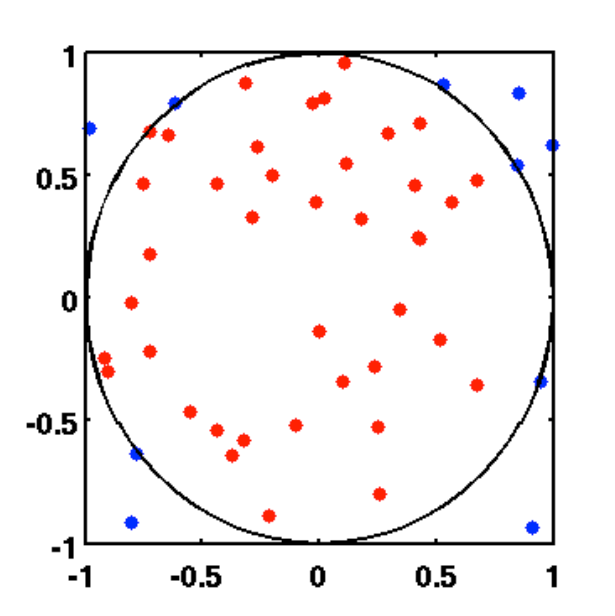

In [17]:
# Download and save the data file MonteCarloCircle.png
url = ('https://raw.githubusercontent.com/rickecon/Notebooks/' +
       'master/NumIntegr/images/MonteCarloCircle.png')
image_file = requests.get(url, allow_redirects=True)
open('images/MonteCarloCircle.png', 'wb').write(image_file.content)
Image('images/MonteCarloCircle.png')

Following the intuition of the previous paragraph and of the figure above, the exact area of the circle can be written as an integral of the indicator function of coordinate variables $x$ and $y$ in the following way.
\begin{equation}\label{EqMontCarlIntPiCircInd}
  \begin{split}
    \text{Area} &= \int_\Omega g(x,y)dx\,dy = \pi \\
    &\quad\text{where}\quad g(x,y) =
      \begin{cases}
        1\quad\text{if}\quad x^2 + y^2 \leq 1 \\
        0\quad\text{else}
      \end{cases} \quad\text{and}\quad \Omega = [-1,1]\times[-1,1]
  \end{split}
\end{equation}
The exact integral for the area of a unit radius circle can be Monte Carlo approximated using the form above resulting in the following function.
\begin{equation}\label{EqMontCarlIntPiCirc}
  \int_\Omega g(x,y)dx\,dy \approx 4\frac{1}{N}\sum_{n=1}^N g\left(x_n,y_n\right)
\end{equation}

### 4.2. Quasi-Monte Carlo integration
It is important to realize what Monte Carlo methods really are in practice. Due to the impracticality of generating truly "random" sequences, Monte Carlo methods utilize pseudorandom sequences. Any sequence generated using a pseudorandom number generator will have a small amount of artificial correlation, and this problem is compounded in higher dimensions.

Quasi-Monte Carlo methods dispense with the attempt to create deterministic samples that mimic random samples, and instead embrace their deterministic character. Judd (1998, ch. 9) defines quasi-Monte Carlo methods as sampling methods that do not rely on probabilistic ideas and pseudorandom sequences for constructing the sample and analyzing the estimate. Quasi-Monte Carlo methods use the same approximating function $\sum_{n=1}^N\omega_n g(x_n)$, but draw on number theory and Fourier analytic methods to create low-discrepancy sequences that are used as sample points. However, other than the selcetion of sample points, quasi-Monte Carlo integration proceeds in exactly the same way as standard Monte Carlo integration as detailed in the previous section.

Many different deterministic sequences can be used in quasi-Monte Carlo sampling.  All of these "quasirandom" sequences strive for uniformity in a general sense. Hence it is useful to have a precise way of measuring the degree to which a point set exhibits uniformity. If we have a uniformly distributed sequence $\mathbf{x}_n$ in the $s$-dimensional unit cube $I^s=[0,1)^s$, we would intuitively expect that every subset of $I^s$ with the same volume would contain the same number of points.  This idea is described precisely by the discrepancy of $\mathbf{x}_n$. We first define local discrepancy, and then define global discrepancy.

For $N$ points $\{\mathbf{x}_n\}_{n=1}^N$ in $I^s$, $s\geq0$, and $J\subseteq I^s$, the local discrepancy $D(J;N)$ is defined by
\begin{equation}\label{EqQMCLocalDiscrep}
  D(J;N)=S(J;N)-V(J)N,
\end{equation}
where $V(J)$ is the volume of the subinterval $J$ and $S(J;N)$ is the number of points from $\{\mathbf{x}_n\}_{n=1}^N$ that are in $J$.  If the $N$ points are uniformly distributed, then the local discrepancy should be very small for all $J$'s.

Finish this section...

### 4.3. Exercises


**Exercise 4.1.** Use Monte Carlo integration to approximate the value of $\pi$. Define a function in that takes as arguments a function $g(\mathbf{x})$ of a vector of variables $\mathbf{x}$, the domain $\Omega$ of $\mathbf{x}$, and the number of random draws $N$ and returns the Monte Carlo approximation of the integral $\int_\Omega g(\mathbf{x}) d\mathbf{x}$. Let $\Omega$ be a generalized rectangle--width $x$ and height $y$. In order to approximate $\pi$, let the functional form of the anonymous function be $g(x,y)$ from Section 4.1 with domain $\Omega = [-1,1]\times[-1,1]$. What is the smallest number of random draws $N$ from $\Omega$ that matches the true value of $\pi$ to the 4th decimal 3.1415? Set the random seed in your uniform random number generator to 25. This will make the correct answer consistent across submissions.

**Exercise 4.2.** Define a function in that returns the $n$-th element of a $d$-dimensional equidistributed sequence.  It should have support for the four sequences in the Table in Section 4.2.

**Exercise 4.3** Repeat Exercise 4.1 to approximate the value of $\pi$, this time using quasi-Monte Carlo integration.  You will need to appropriately scale the equidistributed sequences. Compare the rates of convergence. What is the smallest number of random draws $N$ from $\Omega$ for the quasi-Monte Carlo integration that matches the true value of $\pi$ to the 4th decimal 3.1415?. Set the seed in your uniform random number generator to 25. This will make the correct answer consistent across submissions.

## 5. Sparse Grids
Put Sparse Grids information here.

## 6. Discrete Markov Approximation of Continuous AR(1) Process
Suppose you have a random shock $z_t$ in your model that has some persistence according to the following AR(1) process.
\begin{equation}\label{NumInt_EqAR1}
  z_{t+1} = \rho z_{t} + (1-\rho)\mu + \varepsilon_{t+1} \quad\text{where}\quad \varepsilon_t\sim N(0,\sigma) \quad\text{and}\quad \rho\in(0,1)
\end{equation}
The expected value of $z_{t+1}$ is conditional on the current realization of the shock $E[z_{t+1}|z_t] = \rho z_{t} + (1-\rho)\mu$ but the variance of $z_{t+1}$ is unconditional $Var[z_{t+1}] = \sigma^2$. The AR(1) process in this equation generates a variable that fluctuates around its mean $\mu$, and the expected value of the variable tomorrow $E[z_{t+1}|z_t]$ is some convex combination of the variable today $z_t$ and the mean $\mu$.

Typical examples of these types of shocks in economics are shocks to ability, health status, and productivity shocks--all of which exhibit persistence or dependence on recent values. If the shock must be strictly positive, as is the case with productivity shocks, the variable $z_t$ is simply exponentiated.
\begin{equation}\label{NumInt_EqStochProd}
  Y_t = A_t K_t^\alpha L_t^{1-\alpha} \quad\text{where}\quad A_t = e^{z_t}
\end{equation}
Notice that the variable $A_t$ is lognormally distributed $A_t\sim LN\bigl(\rho z_{t-1} + (1-\rho)\mu,\sigma\bigr)$ because $\log(A_t)=z_t$ and $z_t\sim N\bigl(\rho z_{t-1} + (1-\rho)\mu,\sigma\bigr)$. You made a discretized approximation of the i.i.d. (no persistence) version of this distribution in Exercise 2.3 and estimated average income in the U.S. using it in Exercise 2.4.

Tauchen and Hussey (1991) describe a quadrature-based method for producing efficient nodes and probabilities of a discrete first-order Markov process to approximate a continuous AR(1) random variable. Tauchen (1986) details a simpler non-quadrature based method for producing efficient nodes and probabilities of a discrete first-order Markov process to approximate a continuous AR(1) random variable. A classic example of where this discretization is extremely valuable is in the stochastic intertemporal Euler equation from Section 1.
\begin{equation}\tag{\ref{NumInt_EqEulEx}}
  \begin{split}
    u'(c_t) &^= \beta E_{z_{t+1}|z_t}\Bigl[(1+r_{t+1}-\delta)u'(c_{t+1})\Bigr] \\
    \Rightarrow\quad u'(c_t) &= \beta\int_a^b \Bigl(1+r_{t+1}(z_{t+1})-\delta\Bigr)u'\Bigl(c_{t+1}(z_{t+1})\Bigr)f(z_{t+1}|z_t)dz_{t+1}
  \end{split}
\end{equation}
The expectation on the right-hand-side of the Euler equation is over $z_{t+1}$ given $z_t$, where $z_{t+1}$ is the AR(1) process described at the beginning of this section. One of the most common nonlinear solution techniques for the functional equations of the dynamic household decision problem characterized by this Euler equation is value function iteration on the following recursive Bellman equation.
\begin{equation}\label{NumInt_EqBellman}
  V(k,z) = \max_{k'}\:u(k,z,k') + \beta E_{z'|z}\bigl[V(k',z')\bigr]
\end{equation}

The expectation on the right-hand-side of the Bellman equation is simply an integral of the form $E_{z'|z}\bigl[V(k',z')\bigr] = \int_{z'}V(k',z')f(z'|z)dz'$. However, it is difficult to use standard Gaussian quadrature or Monte Carlo integration methods because the value function $V(k',z')$ is often only known at a few points.

One solution to this problem is to interpolate or fit some continuous function $\tilde{V}(k',z')$ to the known points of $V(k',z')$ and then use Gaussian quadrature or Monte Carlo integration to approximate the integral $\int_{z'}\tilde{V}(k',z')f(z'|z)dz'$. Heer and Maussner (2008) and Heer and Maussner (2009, p. 237) find that the errors in the extrapolated values of the interpolated function $\tilde{V}$ beyond the bounds of the known points of $V$ cause the solution to be less accurate than using the Tauchen-Hussey method of approximating $f(z'|z)$ with a discrete first order Markov process.

## 7. References
* Adda, Jerome and Russell Cooper, *Dynamic Economics: Quantitative Methods and Applications*, MIT Press (2003).
* Armington, Paul S., "A Theory of Demand for Products Distinguished by Place of Production," IMF Staff Papers, 16:1, March (1969).
* Dixit, Avinash K. and Joseph E. Stiglitz, "Monopolistic Competition and Optimum Product Diversity," *American Economic Review*, 67:3, pp. 297-308, June (1977).
* Heer, Burkhard and Alfred Maussner, "Computation of Business Cycle Models: A Comparison of Numerical Methods," *Macroeconomic Dynamics*, 12:5, pp.641-663, November (2008).
* Heer, Burkhard and Alfred Maussner, *Dynamic General Equilibrium Modeling: Computational Methods and Applications*, 2nd edition, Springer (2009).
* Judd, Kenneth L., *Numerical Methods in Economics*, MIT Press, (1998).
* Tauchen, George, "Finite State Markov-chain Approximation to Univariate and Vector Autoregression," *Economics Letters*, 20:2, pp. 177-181 (1986).
* Tauchen, George and Robert Hussey, "Quadrature-based Methods for Obtaining Approximate Solutions to Nonlinear Asset Pricing Models," *Econometrica*, 59:2, pp. 371-396, March (1991).